In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yf
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [47]:
data = yf.download('AAPL', start='2024-01-01', end='2024-05-31')

[*********************100%%**********************]  1 of 1 completed


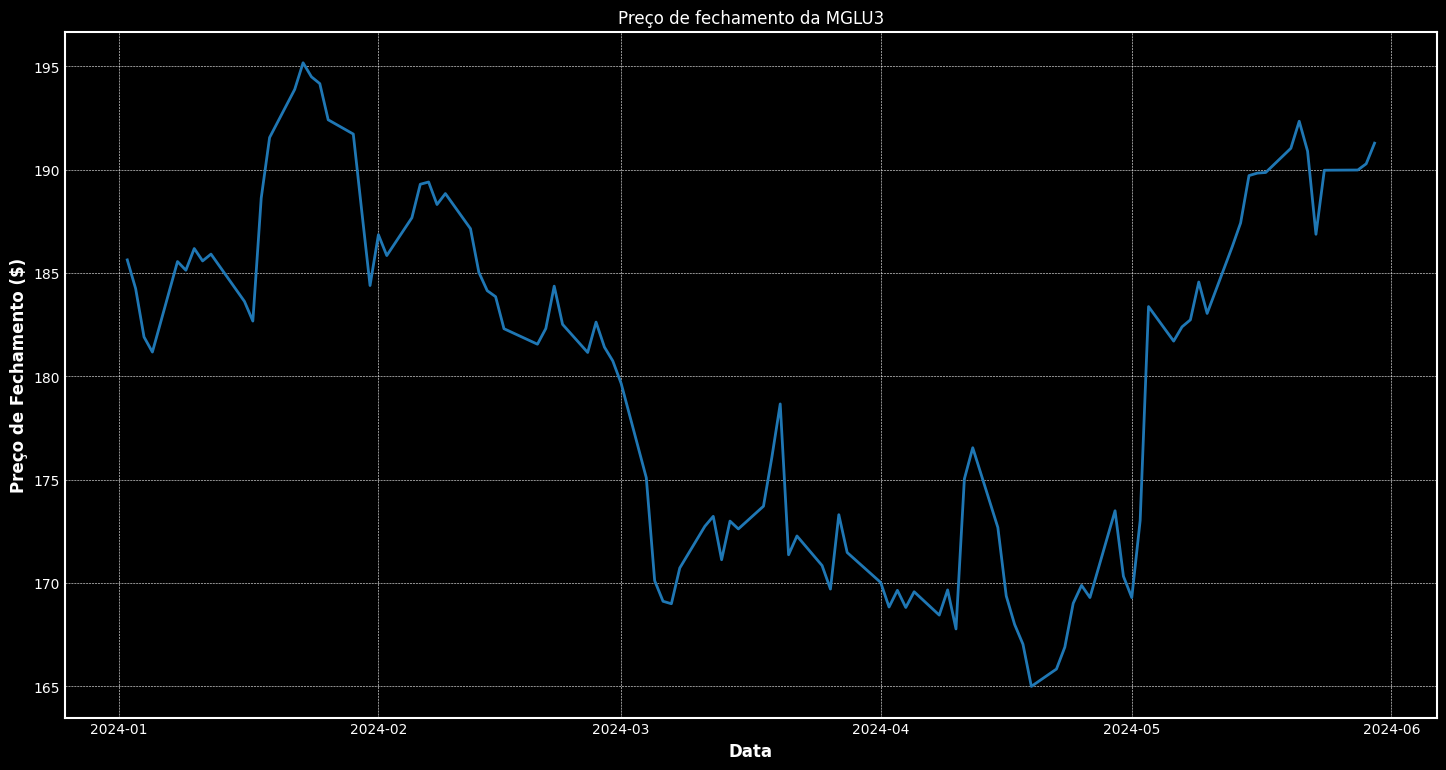

In [50]:
plt.figure(figsize=(14,7))
plt.style.use('_mpl-gallery')
plt.plot(data['Close'])
plt.title('Preço de fechamento da MGLU3')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento ($)')
plt.show()

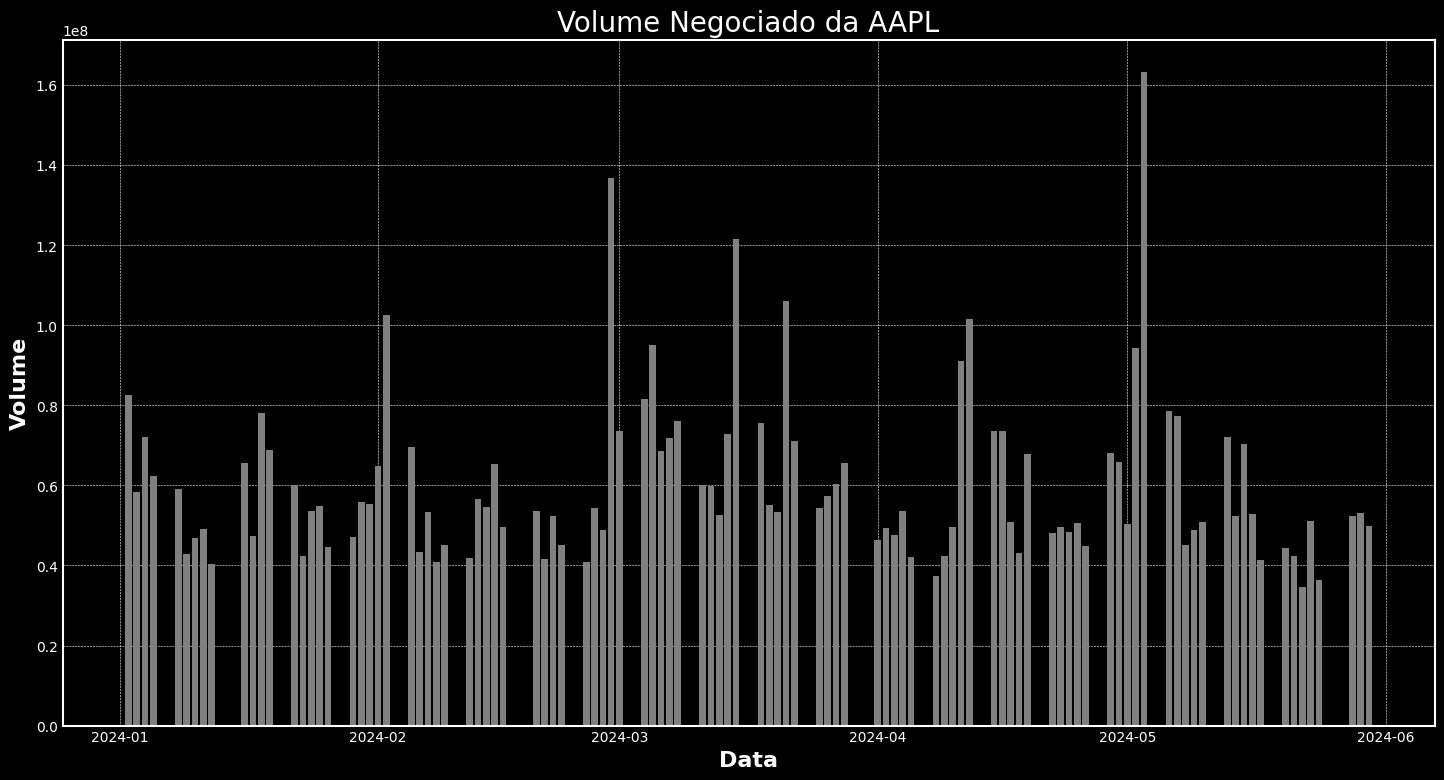

In [51]:
plt.figure(figsize=(14,7))
plt.style.use('_mpl-gallery')
plt.bar(data.index, data['Volume'], color='grey')
plt.title('Volume Negociado da AAPL', fontsize=20)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.grid(True)
plt.show()

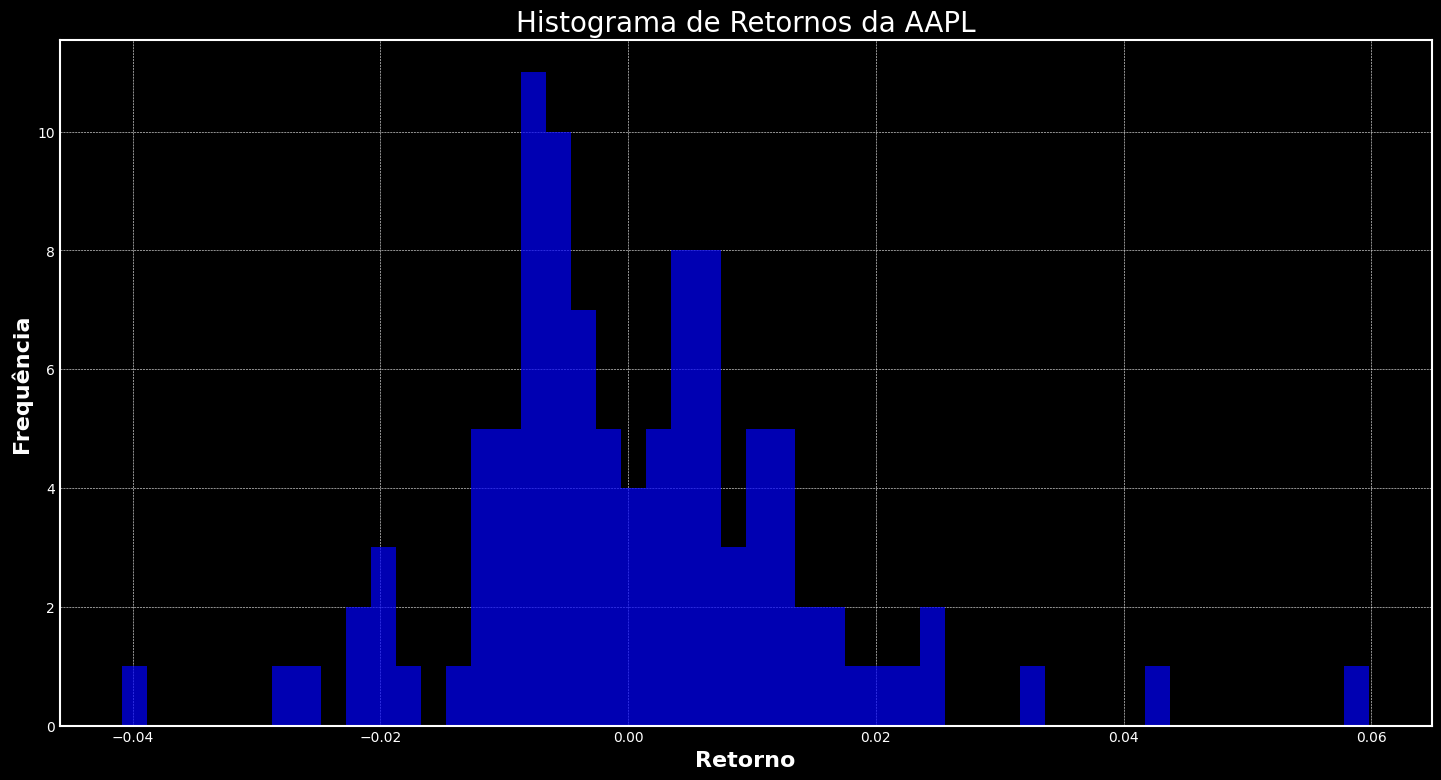

In [52]:
returns = data['Close'].pct_change().dropna()
plt.style.use('_mpl-gallery')
plt.figure(figsize=(14,7))
plt.hist(returns, bins=50, color='blue', alpha=0.7)
plt.title('Histograma de Retornos da AAPL', fontsize=20)
plt.xlabel('Retorno', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.grid(True)
plt.show()

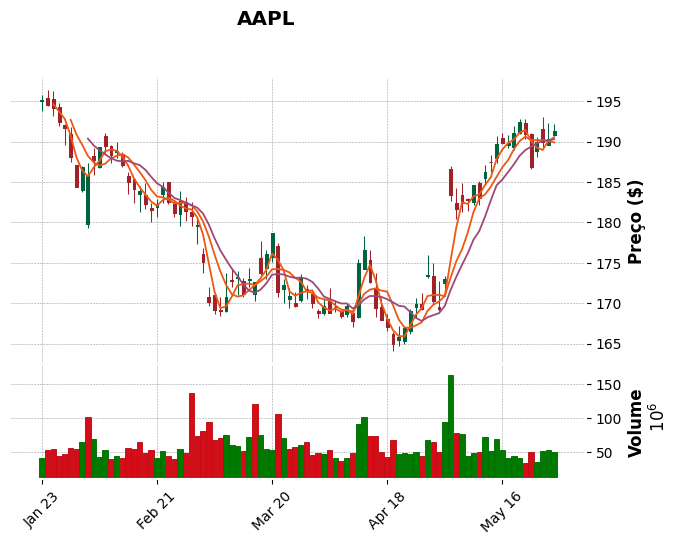

In [53]:
import mplfinance as mpf

plt.style.use('_mpl-gallery')
mpf.plot(data[-90:], type='candle', style='charles',
         title='AAPL',
         ylabel='Preço ($)',
         ylabel_lower='Volume',
         volume=True, 
         mav=(3,6,9))

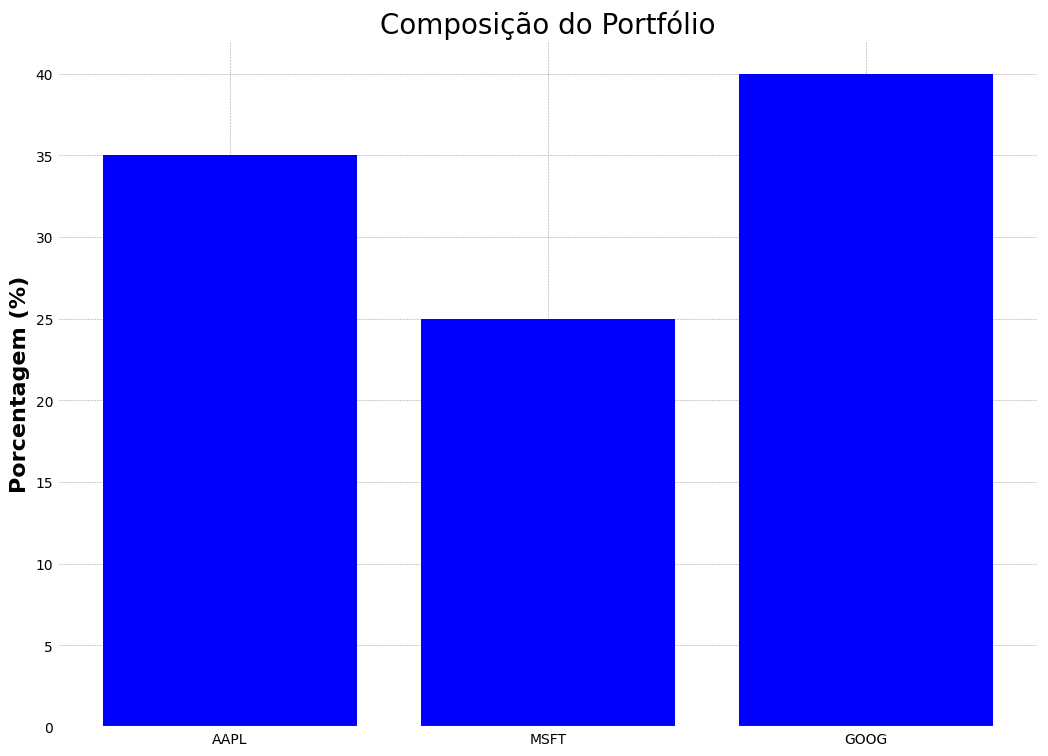

In [55]:
portfolio = {"AAPL": 35, "MSFT": 25, "GOOG": 40}
plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,7))
plt.bar(range(len(portfolio)), list(portfolio.values()), tick_label=list(portfolio.keys()), color='BLUE')
plt.title('Composição do Portfólio', fontsize=20)
plt.ylabel('Porcentagem (%)', fontsize=16)
plt.grid(True)
plt.show()

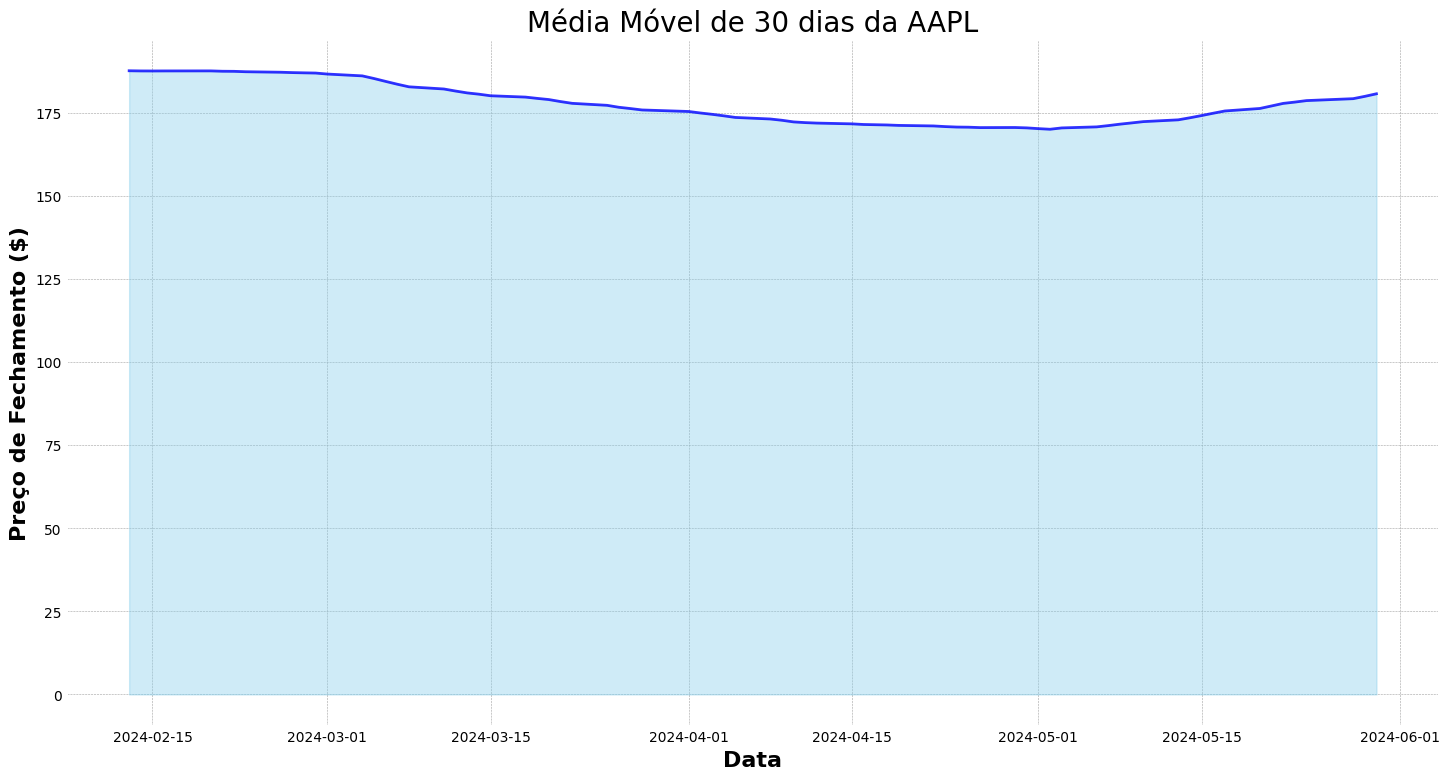

In [56]:
data_rolling = data['Close'].rolling(window=30).mean()

plt.style.use('_mpl-gallery')
plt.figure(figsize=(14,7))
plt.fill_between(data_rolling.index, data_rolling, color="skyblue", alpha=0.4)
plt.plot(data_rolling, color="blue", alpha=0.8)
plt.title('Média Móvel de 30 dias da AAPL', fontsize=20)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Preço de Fechamento ($)', fontsize=16)
plt.grid(True)
plt.show()

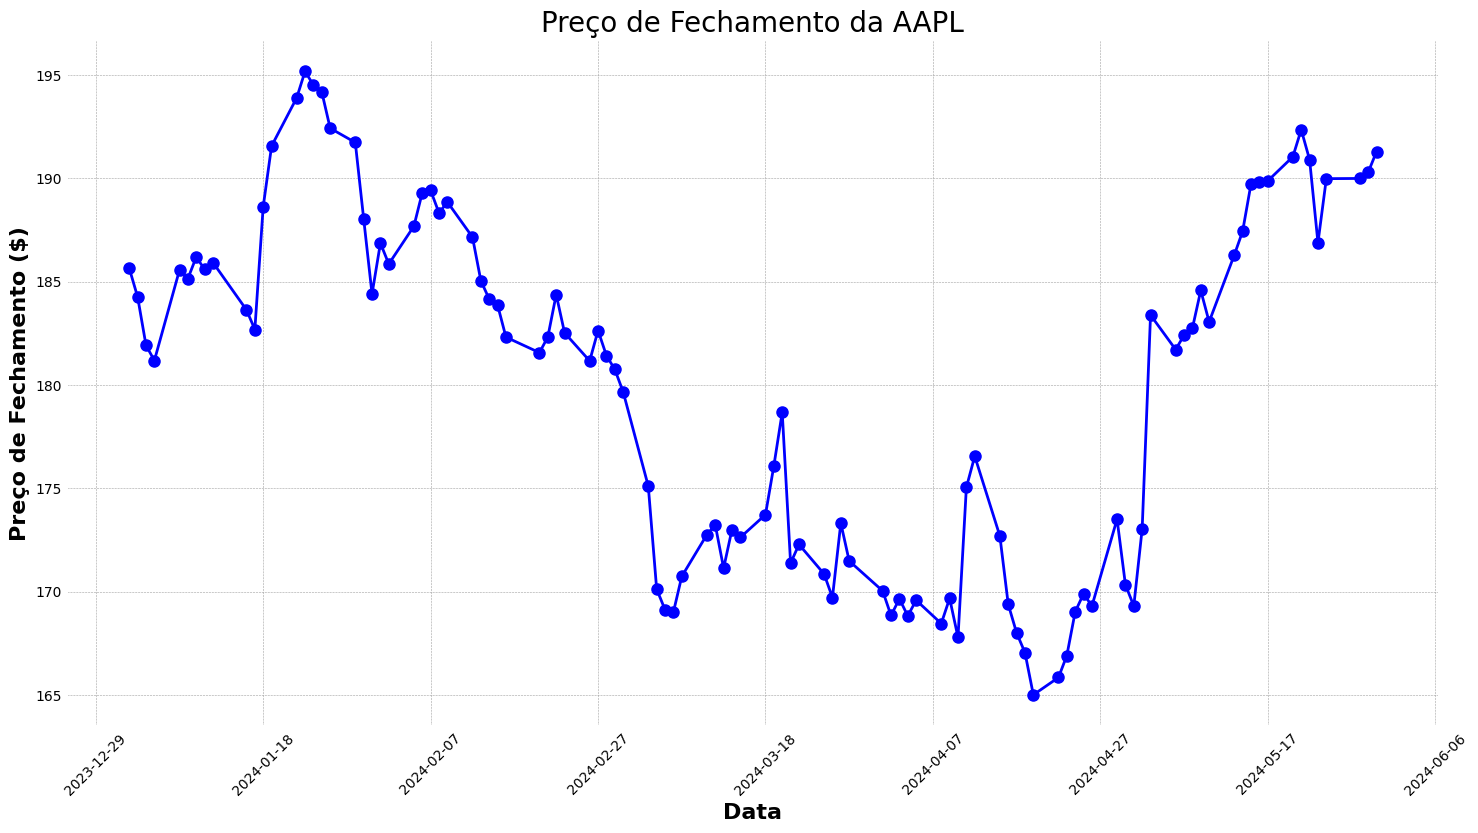

In [35]:
fig, ax = plt.subplots(figsize=(14,7))

ax.plot(data['Close'], marker='o', linestyle='-', linewidth=2, markersize=8, color='blue')
ax.set_xlabel('Data', fontsize=16)
ax.set_ylabel('Preço de Fechamento ($)', fontsize=16)
ax.set_title('Preço de Fechamento da AAPL', fontsize=20)

ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Reduz o número de marcas no eixo X
plt.xticks(rotation=45) # Rotaciona as marcas do eixo X

plt.grid(True)
plt.show()

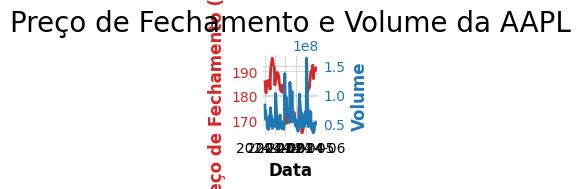

In [36]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço de Fechamento ($)', color=color)
ax1.plot(data.index, data['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volume', color=color)
ax2.plot(data.index, data['Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Preço de Fechamento e Volume da AAPL', fontsize=20)
fig.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Gráfico Interativo'),
 Text(0.5, 0, 'Index'),
 Text(0, 0.5, 'A')]

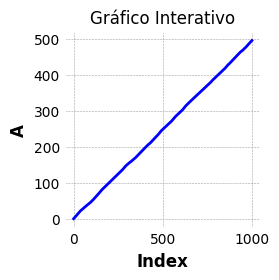

In [43]:
# Cria dados de exemplo
np.random.seed(0)
df = pd.DataFrame(np.random.rand(1000, 1), columns=['A']).cumsum()

# Cria um gráfico de linhas
fig, ax = plt.subplots()
lines = ax.plot(df.index, df['A'], color='blue', lw=2)
ax.set(title='Gráfico Interativo', xlabel='Index', ylabel='A')

In [39]:
# Cria uma anotação e um ponto
annot = ax.annotate("", xy=(0,0), xytext=(-40,20), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

point = ax.scatter([0],[0], color='red', s=100)
point.set_visible(False)

# Função para atualizar a anotação e o ponto
def update_annot(ind):
    x, y = lines[0].get_data()
    annot.xy = (x[ind], y[ind])
    text = f"{ind}: ({x[ind]:.2f}, {y[ind]:.2f})"
    annot.set_text(text)
    point.set_offsets((x[ind], y[ind]))

# Função para responder ao evento de movimento do mouse
def hover(event):
    if event.inaxes == ax:
        ind = np.searchsorted(lines[0].get_xdata(), event.xdata)
        update_annot(ind)
        annot.set_visible(True)
        point.set_visible(True)
    else:
        if annot.get_visible():
            annot.set_visible(False)
            point.set_visible(False)
    fig.canvas.draw_idle()

# Conecta o evento de movimento do mouse à função de resposta
fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando um conjunto de dados de exemplo
tips = sns.load_dataset('tips')

# Visualizando as primeiras linhas do conjunto de dados
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


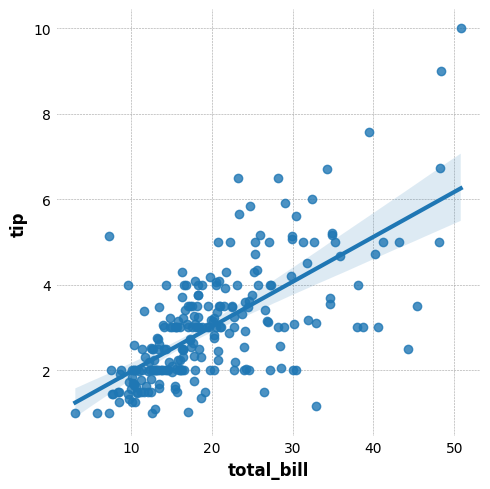

In [41]:
# Criando um gráfico de regressão
sns.lmplot(x='total_bill', y='tip', data=tips)

# Exibindo o gráfico
plt.show()

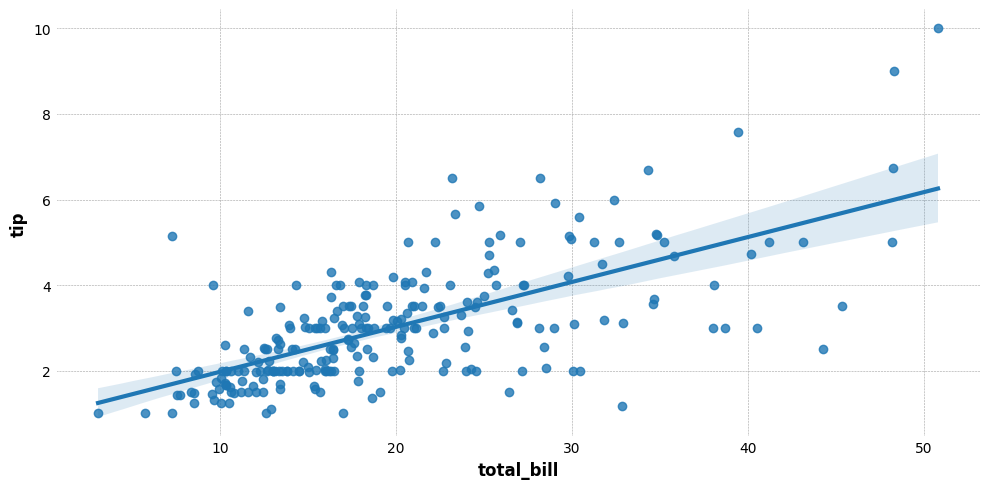

In [42]:
sns.lmplot(x='total_bill', y='tip', data=tips, aspect=2)
plt.show()

In [ ]:
from typing import List, Iterable, TypeVar

T = TypeVar('T')

class Combinador:
    def __init__(self, cnt: int, items: List[T]):
        self._cnt = cnt
        self._items = items
        line0 = [1] + [0] * cnt
        self._somatorios = [line0]
        for itLine in range(1, cnt + 1):
            prevLine = self._somatorios[itLine - 1]
            newLine = [prevLine[itCol - 1] + prevLine[itCol] if itCol > 0 else 0 for itCol in range(len(prevLine))]
            self._somatorios.append(newLine)

    def pegar_combinacao(self, seed: int) -> List[T]:
        return [self._items[i] for i in self.gerar_indices(self._somatorios, len(self._items) - self._cnt, self._cnt, seed)]

    @staticmethod
    def gerar_indices(lines: List[List[int]], fs: int, ts: int, num: int) -> Iterable[int]:
        if ts <= 0:
            return
        line = lines[ts]
        min_val = 0
        for itFs in range(fs + 1):
            max_val = min_val + line[itFs]
            if num < max_val:
                num2 = num - min_val
                yield fs - itFs
                yield from (fs - itFs + idx + 1 for idx in Combinador.gerar_indices(lines, itFs, ts - 1, num2))
                return
            min_val = max_val
        raise Exception(f"O parâmetro deve ser menor que {min_val}")

    


In [64]:
import random

def gera_jogos():
    numero_de_jogos = int(input('Digite a Qtde: '))
    jogos = [[] for _ in range(numero_de_jogos)]
    i = 0

    while i < numero_de_jogos:
        lotofacil = lotofacil_generator()
        if lotofacil in jogos:
            continue
        jogos[i] = lotofacil
        i += 1

    return jogos

def lotofacil_generator():
    resultado = []
    randow = random.Random()
    i = 0

    while i < 15:
        randow_number = randow.randint(1, 25)
        if randow_number in resultado:
            continue
        resultado.append(randow_number)
        i += 1
    resultado.sort()
    return resultado

gera_jogos()

[[2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 17, 18, 20, 23, 25],
 [1, 3, 4, 6, 7, 8, 9, 10, 11, 13, 15, 22, 23, 24, 25]]

In [ ]:
import random
from datetime import datetime

def executa(request, response):
    try:
        # Receive data about the numbers to be drawn
        getNumerosSorteio = request.getParameterValues("numerosSorteio")

        # Receive data from the view and store in a variable
        quantidadeJogos = int(request.getParameter("quantidadeJogos"))

        # Create a list of integers to receive the numbers for the draw
        setNumerosSorteio = [int(num) for num in getNumerosSorteio]

        # Create an ArrayList of integers to store the generated bets
        prognosticos = []

        # Create the games according to the informed quantity
        for _ in range(quantidadeJogos):
            # Create an instance of the Aposta class to receive the bet data
            aposta = Aposta()

            # Get the user ID and store it to link it to the bets
            usuario = SessaoApp.lerUsuario(request)
            aposta.setUsuarioId(usuario.getIdUsuario())

            # Determine which contest is active
            concursoDao = ConcursoDao()
            concursos = concursoDao.getLista()
            for concurso in concursos:
                if concurso.getConcursoAtivo():
                    aposta.setConcursoId(concurso.getIdConcurso())
                    break

            # Set the group ID to 1, i.e., participate in an individual bet
            aposta.setGrupoId(1)

            # Capture the current date
            aposta.setDataAposta(datetime.now())

            # Mark the bet as Active
            aposta.setApostaAtiva(True)

            # Create an instance of the ApostaDao class to add the object to the database
            apostaDao = ApostaDao()
            apostaDao.adicionar(aposta)

            # Logic to generate the combinations
            for _ in range(15):
                r = random.randint(1, 25)
                while r in prognosticos:
                    r = random.randint(1, 25)
                prognosticos.append(r)

            prognosticoAposta = PrognosticoAposta()
            prognosticoApostaDao = PrognosticoApostaDao()

            for prognostico in prognosticos:
                prognosticoAposta.setApostaId(aposta.getIdAposta())
                prognosticoAposta.setPrognosticoAposta(prognostico)
                prognosticoApostaDao.adicionar(prognosticoAposta)

            prognosticos.clear()

        request.setAttribute("mensagem", "Aposta adicionada com sucesso!")
        request.setAttribute("destino", "aposta-automatica-lotofacil.jsp")
        request.getRequestDispatcher("Mensagem").forward(request, response)

    except Exception as e:
        raise e



In [70]:
#Gerar todas as 3.268.760 combinações da Lotofácil? 3268760
import random

def gera_jogos():
    numero_de_jogos = int(input('Digite a Qtde: '))
    jogos = [[] for _ in range(numero_de_jogos)]
    i = 1

    while i < numero_de_jogos:
        lotofacil = lotofacil_generator()
        register = selectDados()
        if lotofacil in register:
            continue
        else:    
            SeveDados(str(i).zfill(6), lotofacil)    
        
            jogos[i] = lotofacil
            i += 1

    return jogos

def lotofacil_generator():
    resultado = []
    randow = random.Random()
    i = 0

    while i < 15:
        randow_number = randow.randint(1, 25)
        if randow_number in resultado:
            continue
        resultado.append(randow_number)
        i += 1
    resultado.sort()
    return resultado

def selectDados():
    with open(f'Report\ProbAllArkivo.txt', 'r', encoding='utf-8') as file:
        content = file.readlines()
    return content

def SeveDados(ID, Ref1):
        try:
            with open(f'Report\ProbAllArkivo.txt', 'a+') as file:      
                file.write(f"{ID}, {Ref1} \n")
                file.seek(0)
        except ValueError:
                    print(f'Existe Um Erro')

gera_jogos()

[[]]